In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

heartdisease_df = pd.read_excel('cleveland.xlsx')


In [2]:
heartdisease_df.info()

heartdisease_df['num'] = np.array([1 if x == "positive" else 0 for x in heartdisease_df['num']])

heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
age         173 non-null float64
sex         173 non-null float64
cp          173 non-null float64
trestbps    173 non-null float64
chol        173 non-null float64
fbs         173 non-null float64
restecg     173 non-null float64
thalach     173 non-null float64
exang       173 non-null float64
oldpeak     173 non-null float64
slope       173 non-null float64
ca          173 non-null float64
thal        173 non-null float64
num         173 non-null object
dtypes: float64(13), object(1)
memory usage: 19.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
age         173 non-null float64
sex         173 non-null float64
cp          173 non-null float64
trestbps    173 non-null float64
chol        173 non-null float64
fbs         173 non-null float64
restecg     173 non-null float64
thalach     173 non-null float64
exang      

In [43]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)
#tek sayıda gozlem oldugu ıcın ıkıye bolup for içine sokunca yarı verılerın gozlem sayıları aynı olmuyor, o yuzden bır tane gozlem eklıycez en sondakını tekrar ekleyelım.

X=X.append(X.iloc[172],ignore_index=True,verify_integrity=True)
y[173]=y[172]
y

C:\Users\Mehtap_Labtop\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
144    0
145    0
146    0
147    0
148    0
149    0
150    0
151    0
152    0
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    1
161    1
162    1
163    1
164    1
165    1
166    1
167    1
168    1
169    1
170    1
171    1
172    1
173    1
Name: num, Length: 174, dtype: int64

In [44]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [45]:
# Data frame to store features and predicted cluster memberships.
ytahmin = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_yarı2, X_pcayarı2),
    (X_yarı1, X_pcayarı1)]):
    # Put the features into ypred.
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin


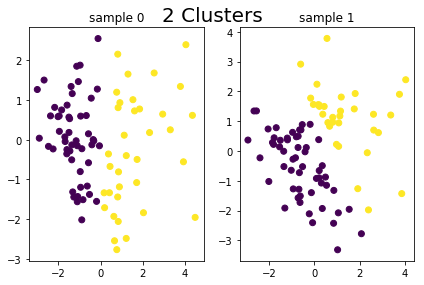

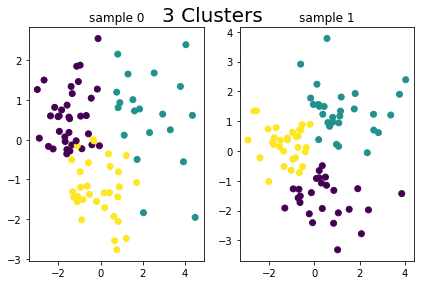

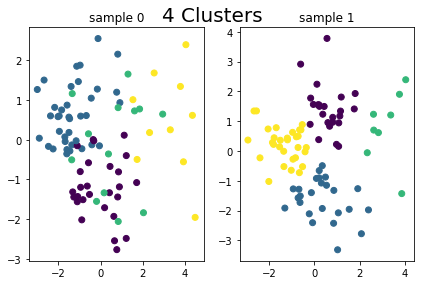

In [46]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [47]:
tam_tahmin2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin2)

0.0899901528665141

In [48]:
tam_tahmin3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin3)

0.06406923438092445

In [49]:
tam_tahmin4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin4)

0.0627881015785457

In [50]:
etiketler2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler2, metric='euclidean'))

0.15064529913751576


In [51]:
etiketler3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler3, metric='euclidean'))

0.1096118653847582


In [52]:
etiketler4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler4, metric='euclidean'))

0.12327539745514526
